In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("all_stocks_5yr.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
def information(df):
    display(df.info())
    display(df.isnull().sum())
    display(df.describe())
information(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


None

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


**Drop missing values**

In [4]:
data =  df.dropna()
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


**Time data processing** 

In [5]:
def retime(data):
    df = data.copy()
    df['date'] = pd.to_datetime(df['date'])  
    df['year'] = df['date'].dt.year  
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df = df.drop(columns="date", errors='ignore') 
    return df
data1 = retime(data)
data1.head()

,open,high,low,close,volume,Name,year,month,day
0,15.07,15.12,14.63,14.75,8407500,AAL,2013,2,8
1,14.89,15.01,14.26,14.46,8882000,AAL,2013,2,11
2,14.45,14.51,14.10,14.27,8126000,AAL,2013,2,12
3,14.30,14.94,14.25,14.66,10259500,AAL,2013,2,13
4,14.94,14.96,13.16,13.99,31879900,AAL,2013,2,14


In [6]:
def plot_features(df, feature_names, plot_type='distplot'):
    num_features = len(feature_names)
    grid_size = (2, 3)
    num_rows = (num_features - 1) // grid_size[1] + 1
    num_cols = min(num_features, grid_size[1])
    plt.figure(figsize=(15, 5 * num_rows))

    for i, col in enumerate(feature_names, 1):
        plt.subplot(num_rows, num_cols, i)
        sns.violinplot(x=col, data=df)
        plt.title(f"{plot_type.capitalize()} of {col}", fontsize=14)
        plt.xlabel(col, fontsize=12)

    plt.tight_layout()
    plt.show()

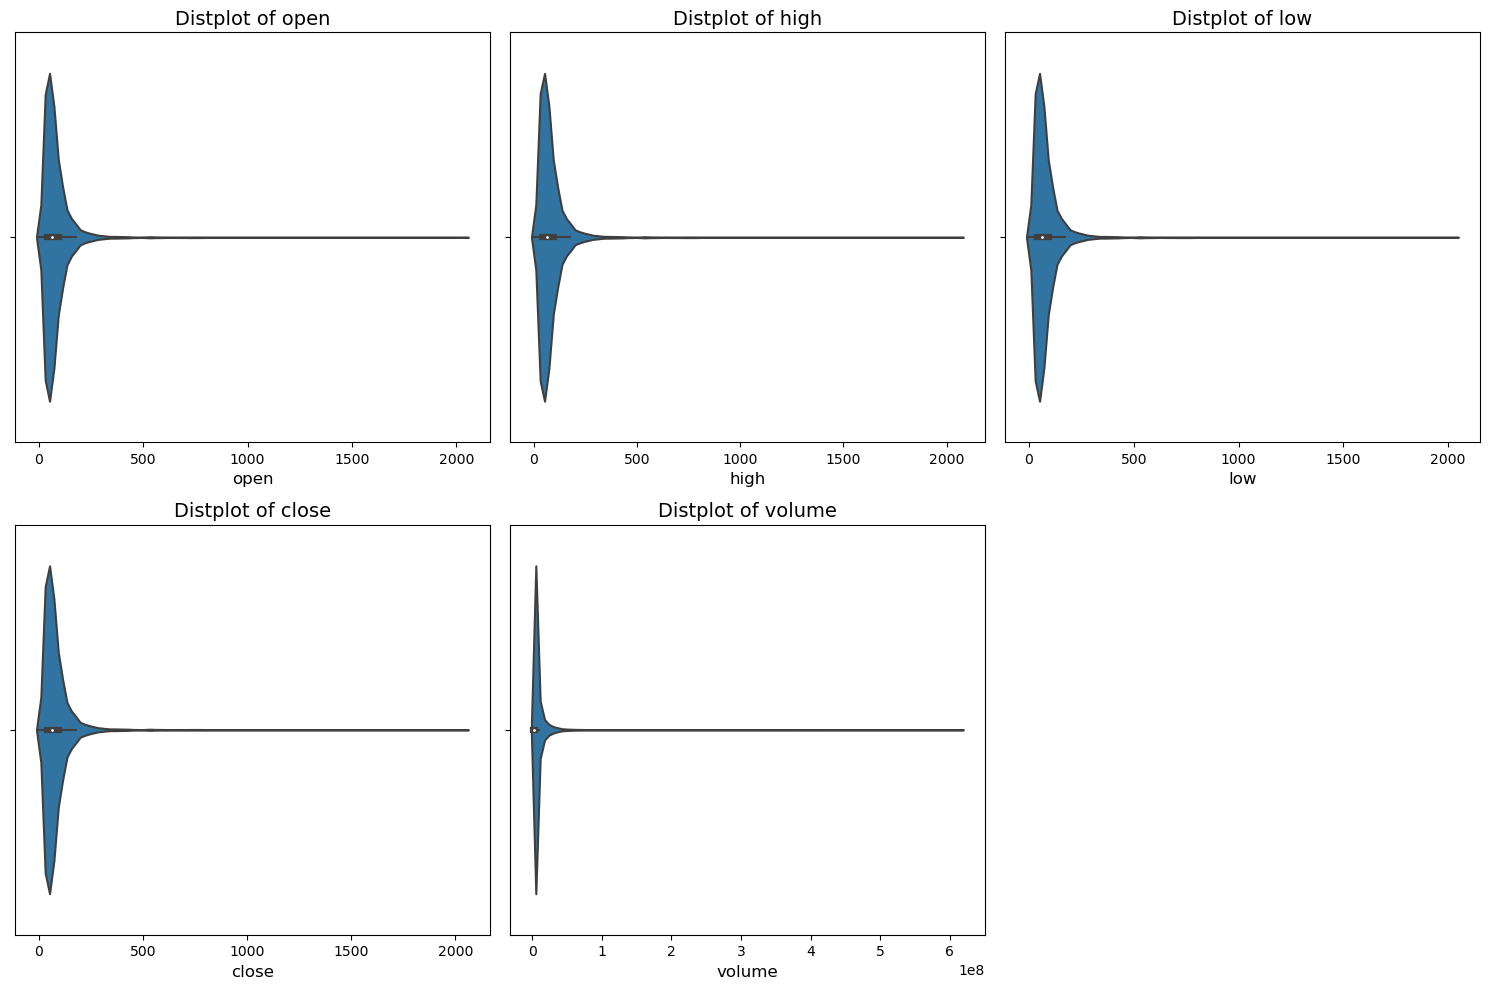

In [7]:
COL = data1.drop(columns=['Name', 'year', 'month', 'day'])
COL = COL.columns
plot_features(data1, COL)

**Handle outliers**

In [8]:
# Create list
out_series = COL

In [9]:
# Determine Outliers range
def find_outliers(df, feature_names):
    data = df.copy()
    for feature_name in feature_names:
        z_scores = np.abs(stats.zscore(data[feature_name]))
        threshold = 3
        data = data[(z_scores < threshold)]
    return data
# Delete defined Outliers values
def remove_outliers(df, feature_names):
    data = df.copy()
    data = find_outliers(data, feature_names)
    return data


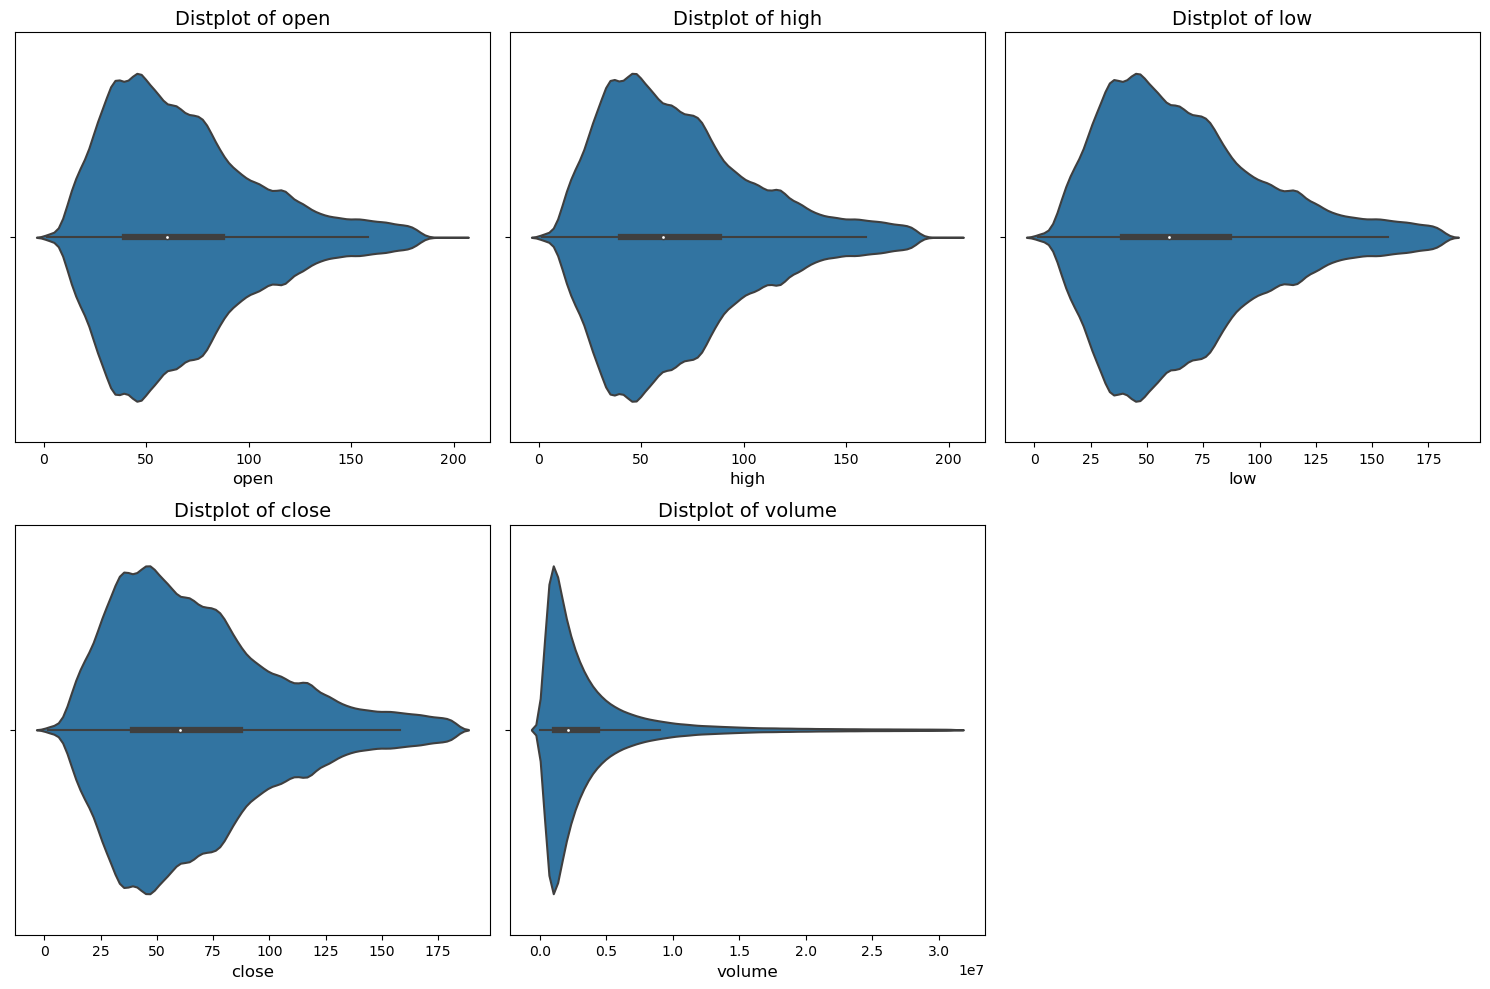

In [10]:
data2 = remove_outliers(data1, out_series)
plot_features(data2, COL)

**Processing Name column**

In [11]:
def processing_data(data):
    label_encoder = LabelEncoder()
    df=data.copy()
    object_columns = ['Name']
    for col in object_columns:
        df[col] = label_encoder.fit_transform(df[col])    
    return df


In [12]:
data3 = processing_data(data2)
data3.head()

,open,high,low,close,volume,Name,year,month,day
0,15.07,15.12,14.63,14.75,8407500,1,2013,2,8
1,14.89,15.01,14.26,14.46,8882000,1,2013,2,11
2,14.45,14.51,14.10,14.27,8126000,1,2013,2,12
3,14.30,14.94,14.25,14.66,10259500,1,2013,2,13
5,13.93,14.61,13.93,14.50,15628000,1,2013,2,15


**Use the volume column as a target**

In [13]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline

def split_data(data,column):
    df = data.copy()
    X = df.drop(columns =[column]).values
    y = df[column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)
    # Normalize data on train and test sets
    scaler= RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test


In [14]:
X_train, X_test, y_train, y_test = split_data(data3,column =  'volume' )

In [15]:
def evaluate_regression_model(x_train, x_test, y_train, y_test,model):
    X_train = x_train[:, :-1]
    X_test = x_test[:, :-1]
    pipeline = make_imb_pipeline(
        model
    )

    model = pipeline.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Tính toán và in ra MSE và RMSE cho tập kiểm tra và huấn luyện
    mse_test = mean_squared_error(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    
    rmse_test = np.sqrt(mse_test)
    rmse_train = np.sqrt(mse_train)
    
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    # Tính toán và in ra R^2 cho tập kiểm tra và huấn luyện
    r2_test = r2_score(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    # In kết quả
    dt= {
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "Mean Absolute Error (MAE)","R² Score"],
    "Test Set": [mse_test, rmse_test,mae_test, r2_test],
    "Train Set": [mse_train, rmse_train,mae_train, r2_train]
    }
    dt = pd.DataFrame(dt)
    results_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
    results_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train })
    results_test = pd.DataFrame({
        'Actual': y_test, 
        'Predicted': [int(pred) for pred in y_pred_test]
    })

    results_train = pd.DataFrame({
        'Actual': y_train, 
        'Predicted': [int(pred) for pred in y_pred_train]
    })
    #pd.options.display.float_format = None
    return results_test,results_train ,dt

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
retest_LR,retrain_LR,d_LR = evaluate_regression_model(X_train, X_test, y_train, y_test,model = LinearRegression())
#pd.options.display.float_format = '{:,.5f}'.format
#pd.options.display.float_format = None
d_LR

,Metric,Test Set,Train Set
0,Mean Squared Error (MSE),1.714975e+13,1.732434e+13
1,Root Mean Squared Error (RMSE),4.141226e+06,4.162252e+06
2,Mean Absolute Error (MAE),2.668836e+06,2.674631e+06
3,R² Score,1.124268e-01,1.147064e-01


**Target is Volume column**

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
def model_Linear(data,column):
    df=data.copy()
    X_train, X_test, y_train, y_test = split_data(data3,column)
    retest_LR,retrain_LR,d_LR = evaluate_regression_model(X_train, X_test, y_train, y_test,model = LinearRegression())
    print("result model")
    display(d_LR)
    print("result test predict")
    display(retest_LR)
    print("result train predict")
    display(retrain_LR)
    return retest_LR,retrain_LR,d_LR

In [27]:
retest_LR1,retrain_LR1,d_LR1= model_Linear(data3,column = 'volume')

result model


,Metric,Test Set,Train Set
0,Mean Squared Error (MSE),1.714975e+13,1.732434e+13
1,Root Mean Squared Error (RMSE),4.141226e+06,4.162252e+06
2,Mean Absolute Error (MAE),2.668836e+06,2.674631e+06
3,R² Score,1.124268e-01,1.147064e-01


result test predict


,Actual,Predicted
0,3338405,5198430
1,906402,2182414
2,317246,1092765
3,1013016,4341864
4,2390362,3325902
...,...,...
172518,6393599,3139661
172519,3274333,2975713
172520,2401492,1784602
172521,12921064,5494986


result train predict


,Actual,Predicted
0,504093,4053445
1,2438869,4803154
2,1328504,3718364
3,315969,720930
4,1336438,2756849
...,...,...
402547,959478,1845737
402548,2796044,5297769
402549,1039640,3906059
402550,2012059,3083573


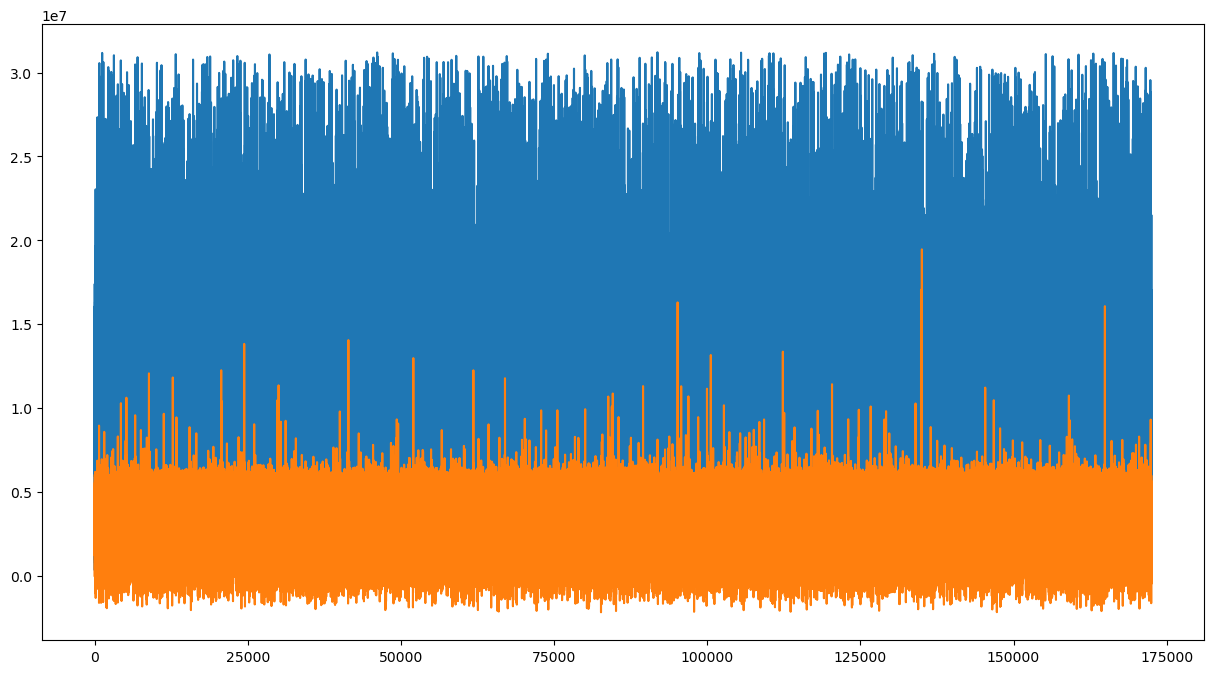

In [28]:
plt.figure(figsize=(15, 8))
plt.plot(retest_LR1.Actual.index, retest_LR1.Actual, label='Actual')
plt.plot(retest_LR1.Actual.index, retest_LR1.Predicted, label='Predicted')
plt.show()


**Target is close column**

In [29]:
retest_LR2,retrain_LR2,d_LR2 = model_Linear(data3,column = 'close')

result model


,Metric,Test Set,Train Set
0,Mean Squared Error (MSE),0.175600,0.180633
1,Root Mean Squared Error (RMSE),0.419047,0.425009
2,Mean Absolute Error (MAE),0.273071,0.274088
3,R² Score,0.999870,0.999867


result test predict


,Actual,Predicted
0,35.59,35
1,92.50,93
2,152.24,152
3,100.83,101
4,78.11,77
...,...,...
172518,79.51,79
172519,81.10,81
172520,105.40,104
172521,17.49,17


result train predict


,Actual,Predicted
0,46.18,46
1,38.43,38
2,79.92,80
3,144.06,144
4,89.07,89
...,...,...
402547,104.89,104
402548,33.42,33
402549,68.54,68
402550,74.64,74


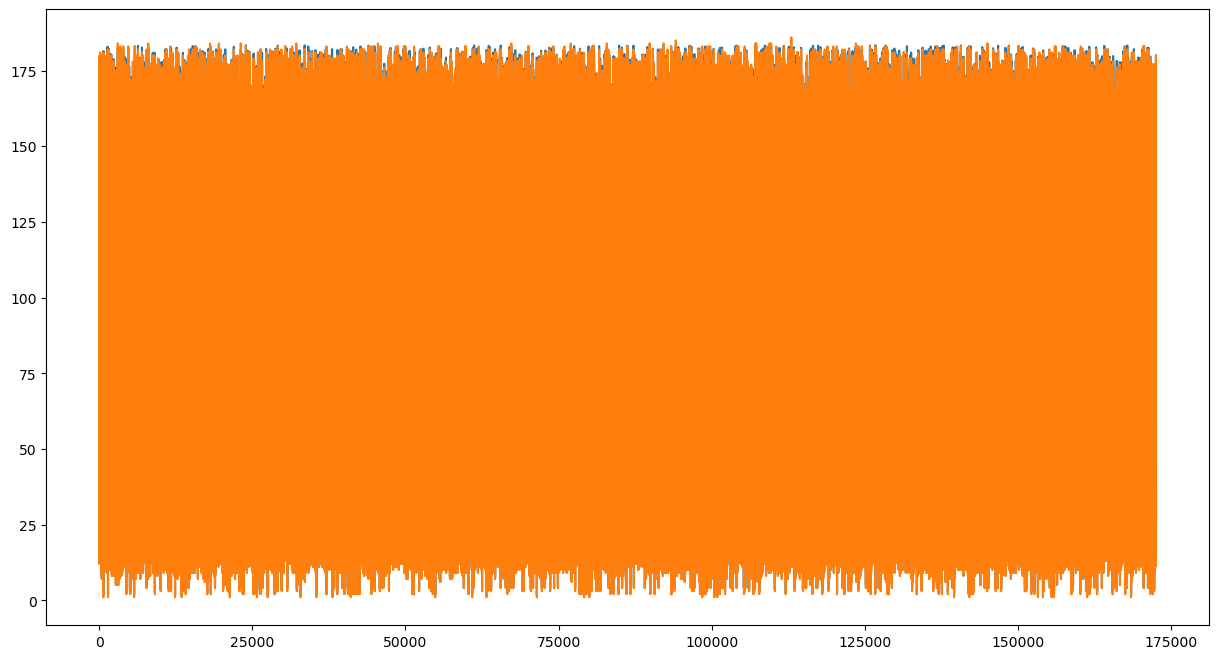

In [30]:
plt.figure(figsize=(15, 8))
plt.plot(retest_LR2.Actual.index, retest_LR2.Actual, label='Actual')
plt.plot(retest_LR2.Actual.index, retest_LR2.Predicted, label='Predicted')
plt.show()


**Target is Open column**

In [31]:
retest_LR3,retrain_LR3,d_LR3= model_Linear(data3,column = 'open')

result model


,Metric,Test Set,Train Set
0,Mean Squared Error (MSE),0.188316,0.195248
1,Root Mean Squared Error (RMSE),0.433954,0.441869
2,Mean Absolute Error (MAE),0.276531,0.278051
3,R² Score,0.999860,0.999856


result test predict


,Actual,Predicted
0,35.81,35
1,92.39,93
2,153.45,152
3,104.54,103
4,77.31,76
...,...,...
172518,78.35,78
172519,81.00,81
172520,105.22,104
172521,17.50,17


result train predict


,Actual,Predicted
0,46.50,46
1,37.75,37
2,80.68,80
3,145.77,145
4,89.56,89
...,...,...
402547,105.01,104
402548,33.93,33
402549,69.58,69
402550,74.07,73


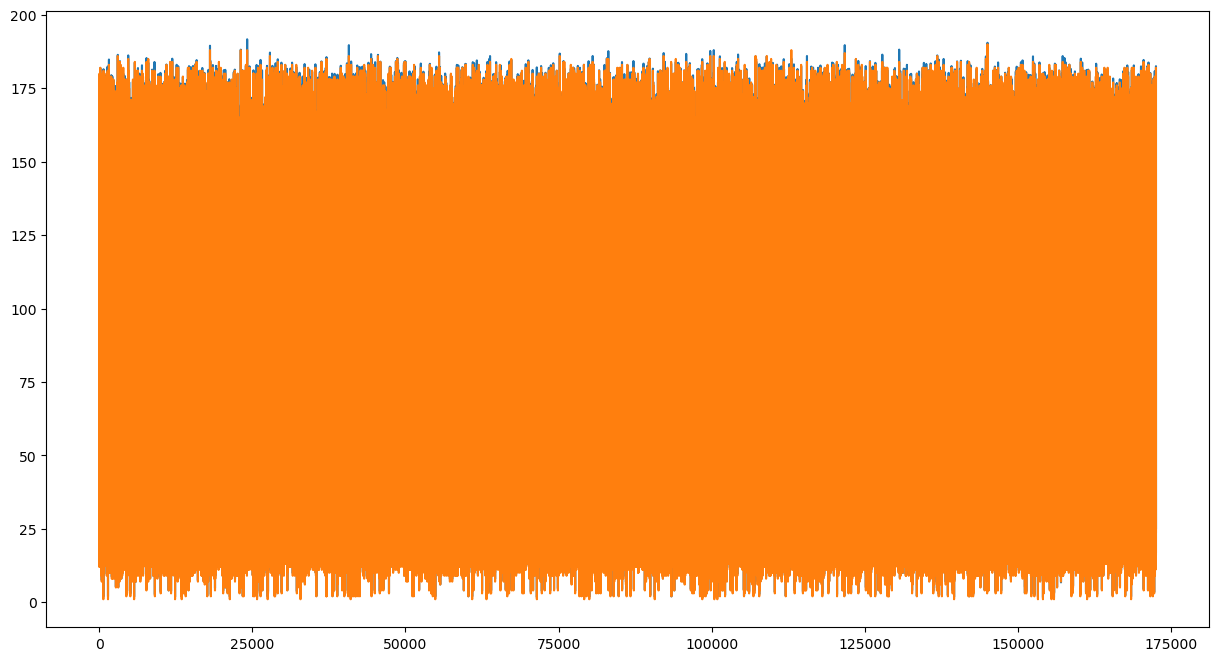

In [32]:
plt.figure(figsize=(15, 8))
plt.plot(retest_LR3.Actual.index, retest_LR3.Actual, label='Actual')
plt.plot(retest_LR3.Actual.index, retest_LR3.Predicted, label='Predicted')
plt.show()


**Target is high column**

In [33]:
retest_LR4,retrain_LR4,d_LR4 = model_Linear(data3,column = 'high')

result model


,Metric,Test Set,Train Set
0,Mean Squared Error (MSE),0.162277,0.169453
1,Root Mean Squared Error (RMSE),0.402836,0.411647
2,Mean Absolute Error (MAE),0.254374,0.256244
3,R² Score,0.999882,0.999877


result test predict


,Actual,Predicted
0,35.8868,36
1,93.6500,92
2,154.1700,154
3,104.8800,104
4,78.2100,78
...,...,...
172518,79.5900,79
172519,81.4800,81
172520,105.5000,106
172521,17.7900,17


result train predict


,Actual,Predicted
0,46.530,46
1,38.450,38
2,80.910,80
3,146.204,146
4,89.820,89
...,...,...
402547,105.680,105
402548,34.045,34
402549,69.710,69
402550,74.835,75


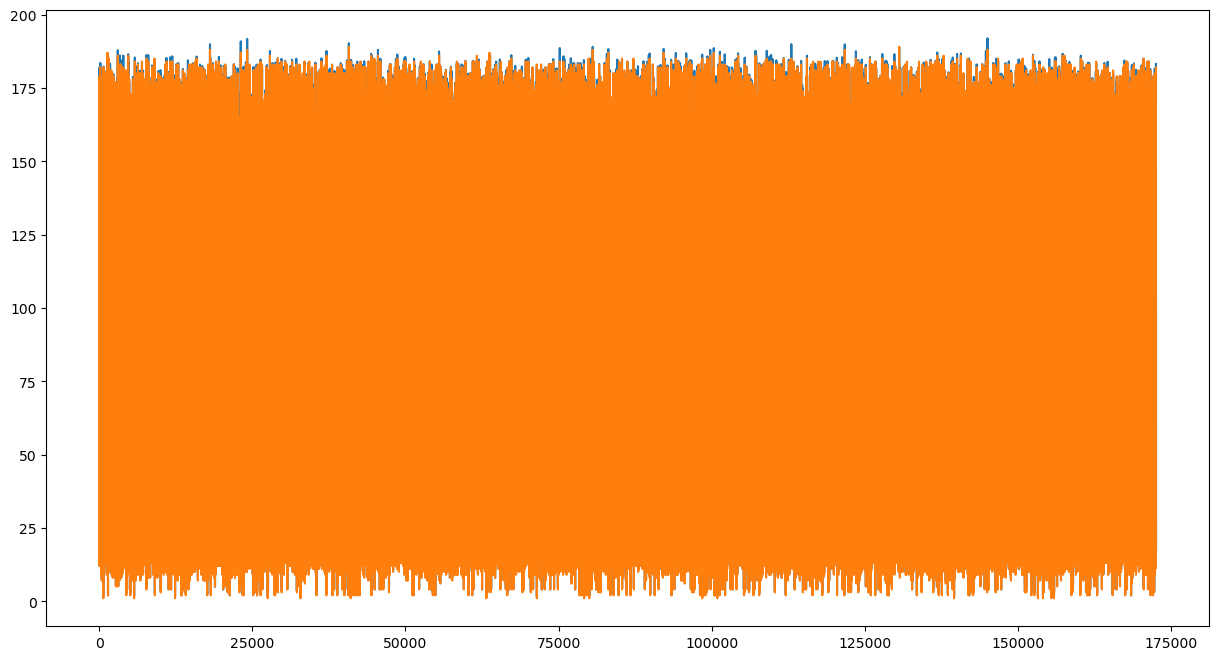

In [34]:
plt.figure(figsize=(15, 8))
plt.plot(retest_LR4.Actual.index, retest_LR4.Actual, label='Actual')
plt.plot(retest_LR4.Actual.index, retest_LR4.Predicted, label='Predicted')
plt.show()


**Target is low column**

In [35]:
retest_LR5,retrain_LR5,d_LR5 = model_Linear(data3,column = 'low')

result model


,Metric,Test Set,Train Set
0,Mean Squared Error (MSE),0.181663,0.184998
1,Root Mean Squared Error (RMSE),0.426219,0.430114
2,Mean Absolute Error (MAE),0.260825,0.261076
3,R² Score,0.999863,0.999861


result test predict


,Actual,Predicted
0,35.2900,35
1,92.2500,91
2,150.8600,151
3,100.5900,100
4,76.3400,77
...,...,...
172518,78.1800,78
172519,80.9200,80
172520,104.3600,104
172521,16.9400,17


result train predict


,Actual,Predicted
0,46.090,46
1,37.590,37
2,79.680,79
3,143.230,143
4,88.950,88
...,...,...
402547,104.120,104
402548,33.155,33
402549,68.490,68
402550,73.250,73


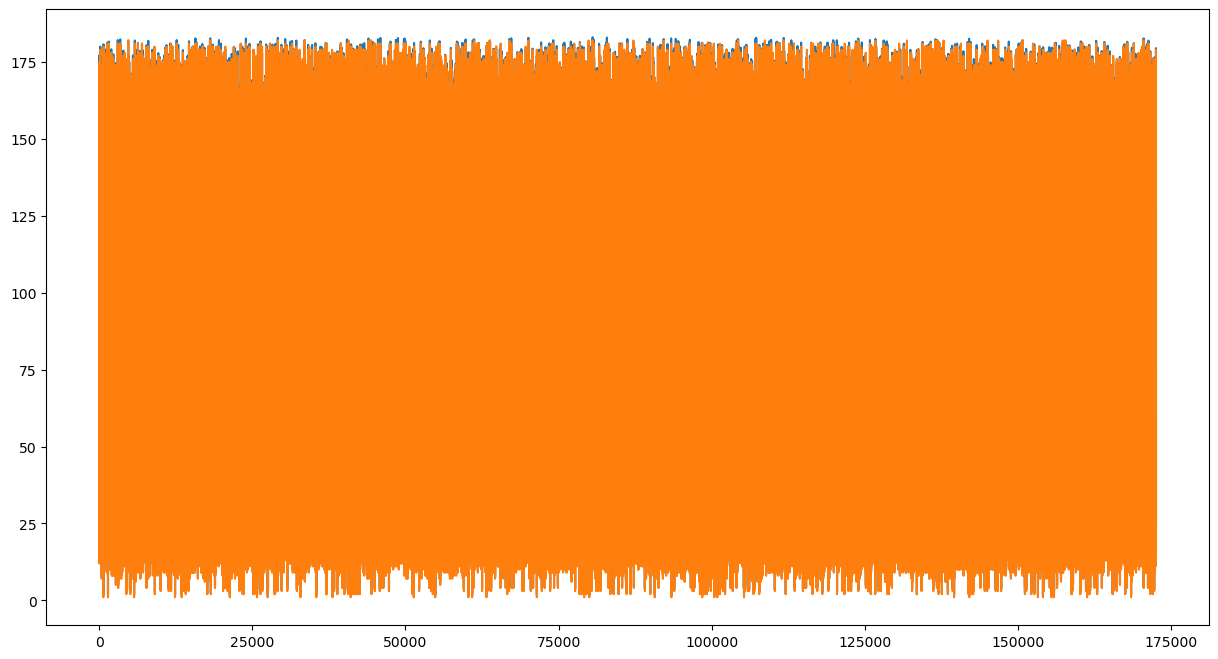

In [36]:
plt.figure(figsize=(15, 8))
plt.plot(retest_LR5.Actual.index, retest_LR5.Actual, label='Actual')
plt.plot(retest_LR5.Actual.index, retest_LR5.Predicted, label='Predicted')
plt.show()
